In [1]:
!pip install kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 602M/612M [00:04<00:00, 119MB/s]
100% 612M/612M [00:04<00:00, 131MB/s]


In [6]:
!unzip gtsrb-german-traffic-sign

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [8]:
!pwd

/content


In [7]:
# Importing the neccessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
import tensorflow.keras as keras
from PIL import Image

In [9]:
# Loading the data

# Data consists of over 50000 images of traffic signs belonging to 43 diffrent classes
# The train folder has over 39000 images for training and Test folder contains of 12000 images.
# The Meta folder contains a image of each class
# The CSV file contains of image dimension,its path and corresponding label


cwd="/content"
os.listdir(cwd)

['.config',
 'kaggle.json',
 'Train.csv',
 'meta',
 'test',
 'Test.csv',
 'Meta',
 'Test',
 'train',
 'Meta.csv',
 'gtsrb-german-traffic-sign.zip',
 'Train',
 'sample_data']

In [10]:
meta = os.listdir('Meta')
meta.remove('.~lock.ClassesInformation.ods#')
meta.remove('.~lock.ClassesInformationStrong.ods#')
meta

['41.png',
 '39.png',
 '38.png',
 '12.png',
 '20.png',
 '15.png',
 '33.png',
 '25.png',
 '35.png',
 '40.png',
 '30.png',
 '29.png',
 '19.png',
 '1.png',
 '21.png',
 '28.png',
 '4.png',
 '31.png',
 '9.png',
 '3.png',
 '11.png',
 '6.png',
 '23.png',
 '42.png',
 '8.png',
 '7.png',
 '27.png',
 '24.png',
 '14.png',
 '18.png',
 '26.png',
 '5.png',
 '32.png',
 '37.png',
 '34.png',
 '0.png',
 '22.png',
 '13.png',
 '36.png',
 '17.png',
 '10.png',
 '16.png',
 '2.png']

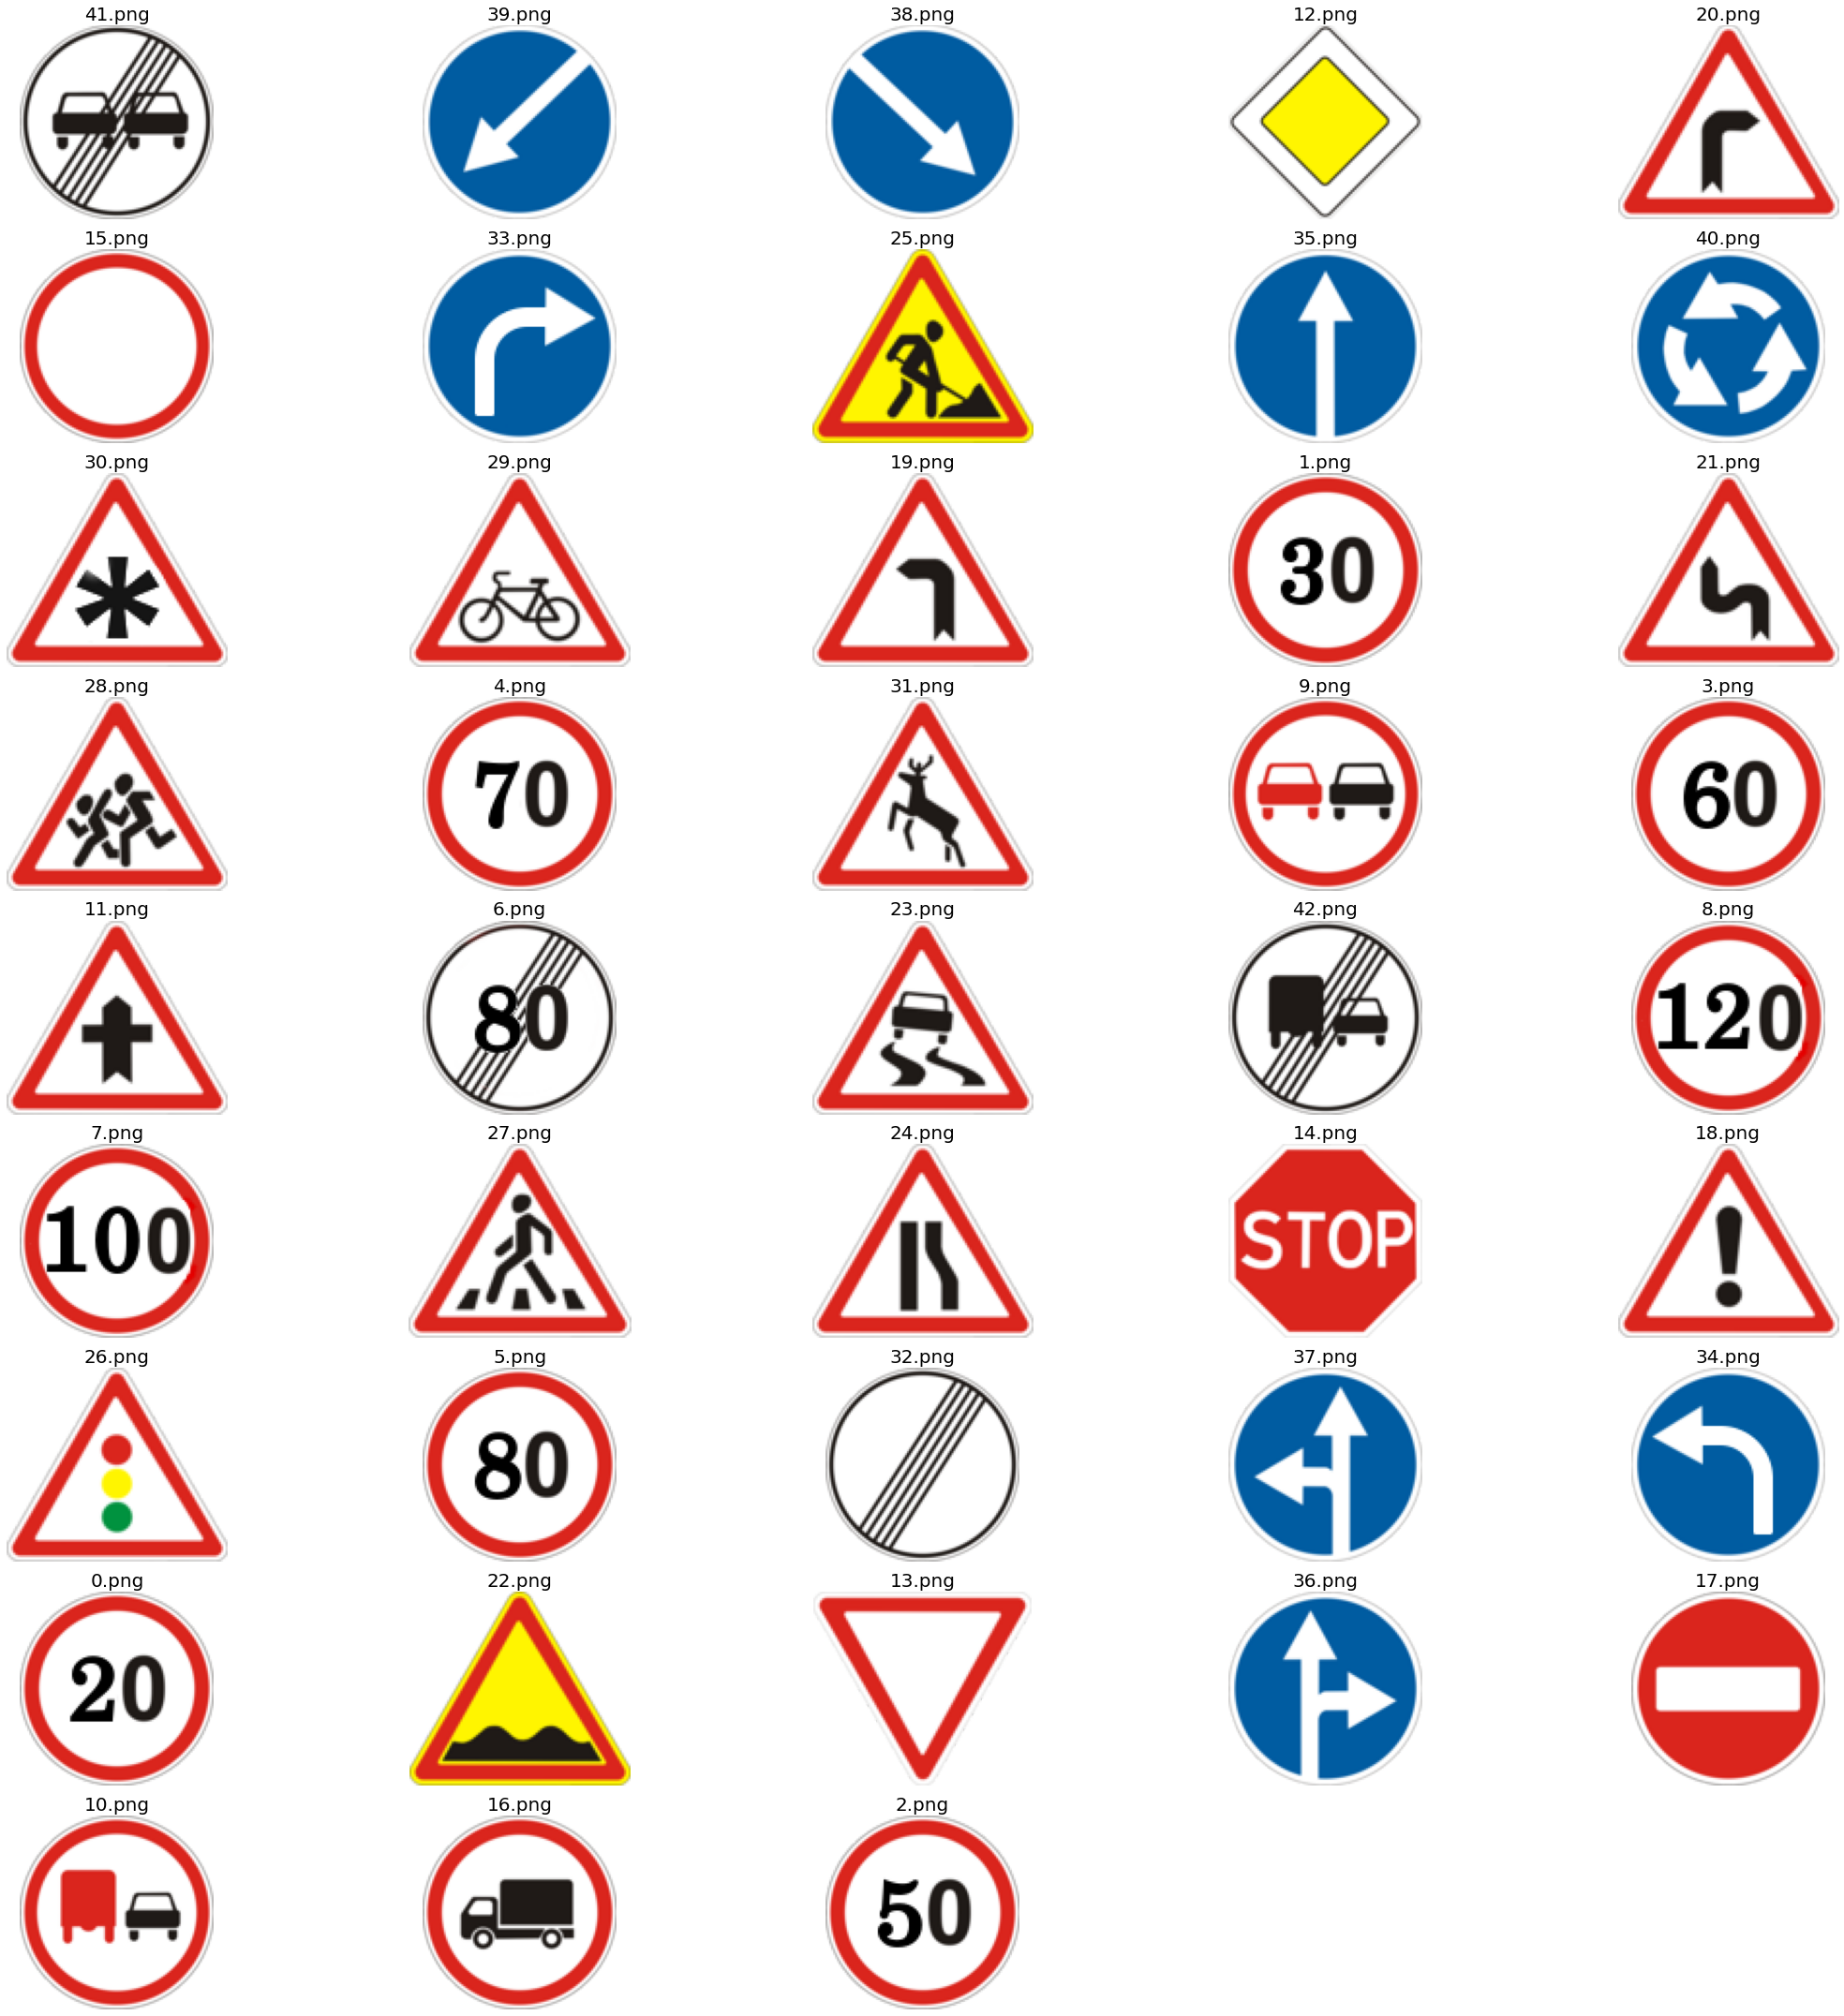

In [11]:
# Viewing images belonging to each class

plt.figure(figsize=(30,30))
for i, file in enumerate(meta):
        img = Image.open('Meta/'+file)
        ax = plt.subplot(9,5, i+1)
        ax.imshow(img)
        ax.set_title(file, size=20)
        plt.axis("off")
plt.tight_layout()

In [12]:
# creating dictionary for classlabels

classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [13]:
train_df = pd.read_csv("Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [14]:
train_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [15]:
# The average dimensions of all images are 50*50 pixels
# All images are resized as 50,50 pixels and saved as numpy array
# The data is normalised and the labels are one hot encoded

print(f'minimum width: {train_df.Width.min()}')
print(f'minimum height: {train_df.Height.min()}')
print(f'average width: {train_df.Width.mean()}')
print(f'average height: {train_df.Height.mean()}')

minimum width: 25
minimum height: 25
average width: 50.83587951745773
average height: 50.328929582493814


In [16]:
train_x =[]
for i in train_df.Path:
    img = Image.open(i)            # reading image
    img = img.resize((50,50))          # resizing image
    train_x.append(np.array(img))      # saving image as array to train
    
train_y = np.array(train_df.ClassId)
train_x = np.array(train_x)
print(train_x.shape)
print(train_y.shape)

(39209, 50, 50, 3)
(39209,)


In [17]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [18]:
test_df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [19]:
test_x=[]
for i in test_df.Path:
    img = Image.open(i)
    img = img.resize((50,50))
    test_x.append(np.array(img))
    
test_y = np.array(test_df.ClassId)
test_x = np.array(test_x)
print(test_x.shape)
print(test_y.shape)

(12630, 50, 50, 3)
(12630,)


Dangerous curve right


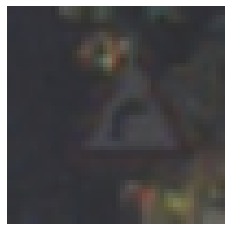

In [20]:
print(classes[train_y[2]])
plt.imshow(train_x[2])
plt.axis('off')
plt.show()

In [21]:
# Normalising the Data

xtrain = train_x/255
xtest  = test_x/255

# one hot encoding

ytrain = keras.utils.to_categorical(train_y)
ytest = keras.utils.to_categorical(test_y)

In [22]:
# Building CNN model

from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrain, ytrain, test_size=0.2,random_state= 0)
print(xtrain.shape)
print(xvalid.shape)
print(ytrain.shape)
print(yvalid.shape)

(31367, 50, 50, 3)
(7842, 50, 50, 3)
(31367, 43)
(7842, 43)


In [23]:
import keras
import tensorflow

In [24]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation

cnn=Sequential()


cnn.add(Conv2D(filters=32, kernel_size= (5,5), strides=2, activation='relu', padding='same', input_shape=(50,50,3)))
cnn.add(Conv2D(filters=32, kernel_size=(5,5), strides=2, activation='relu', padding='same'))
cnn.add(MaxPool2D((2,2), padding='valid'))
cnn.add(Dropout(0.2))



cnn.add(Conv2D(filters=64, kernel_size =(5,5), strides=2, activation='relu',  padding='same'))
cnn.add(Conv2D(filters=64, kernel_size =(5,5), strides=2, activation='relu',  padding='same'))
cnn.add(MaxPool2D((2,2), padding='valid'))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(300, activation='relu'))
cnn.add(Dense(200, activation='relu'))
cnn.add(Dense(43, activation='softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 2, 64)          102464    
                                                        

In [25]:
# Compiling the CNN model

cnn.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
# fitting the model with early call back

earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights = True)

cnn_history = cnn.fit(xtrain, ytrain, epochs=200, validation_data=(xvalid,yvalid),callbacks=[earlystop_cb])

Epoch 1/200
981/981 [==============================] - 21s 12ms/step - loss: 3.5680 - accuracy: 0.0610 - val_loss: 3.4808 - val_accuracy: 0.0592
Epoch 2/200
981/981 [==============================] - 11s 11ms/step - loss: 3.4086 - accuracy: 0.1003 - val_loss: 3.2459 - val_accuracy: 0.1586
Epoch 3/200
981/981 [==============================] - 11s 11ms/step - loss: 2.6306 - accuracy: 0.2864 - val_loss: 1.7403 - val_accuracy: 0.4992
Epoch 4/200
981/981 [==============================] - 11s 11ms/step - loss: 1.4692 - accuracy: 0.5582 - val_loss: 1.2519 - val_accuracy: 0.6228
Epoch 5/200
981/981 [==============================] - 11s 11ms/step - loss: 0.9866 - accuracy: 0.6916 - val_loss: 0.5948 - val_accuracy: 0.8247
Epoch 6/200
981/981 [==============================] - 11s 11ms/step - loss: 0.7581 - accuracy: 0.7580 - val_loss: 0.9817 - val_accuracy: 0.7225
Epoch 7/200
981/981 [==============================] - 11s 12ms/step - loss: 0.6072 - accuracy: 0.8083 - val_loss: 0.3537 - val_ac

In [27]:
pd.DataFrame(cnn_history.history).plot

In [28]:
## Evaluation of CNN

loss, accuracy = cnn.evaluate(xtest,ytest)
print(f'loss={loss:.2f}\naccuaracy={accuracy*100:.2f}%')

395/395 [==============================] - 3s 6ms/step - loss: 0.3602 - accuracy: 0.9296
loss=0.36
accuaracy=92.96%


In [29]:
# Prediction

prob = cnn.predict(xtest)
pred = np.argmax(prob, axis=-1)

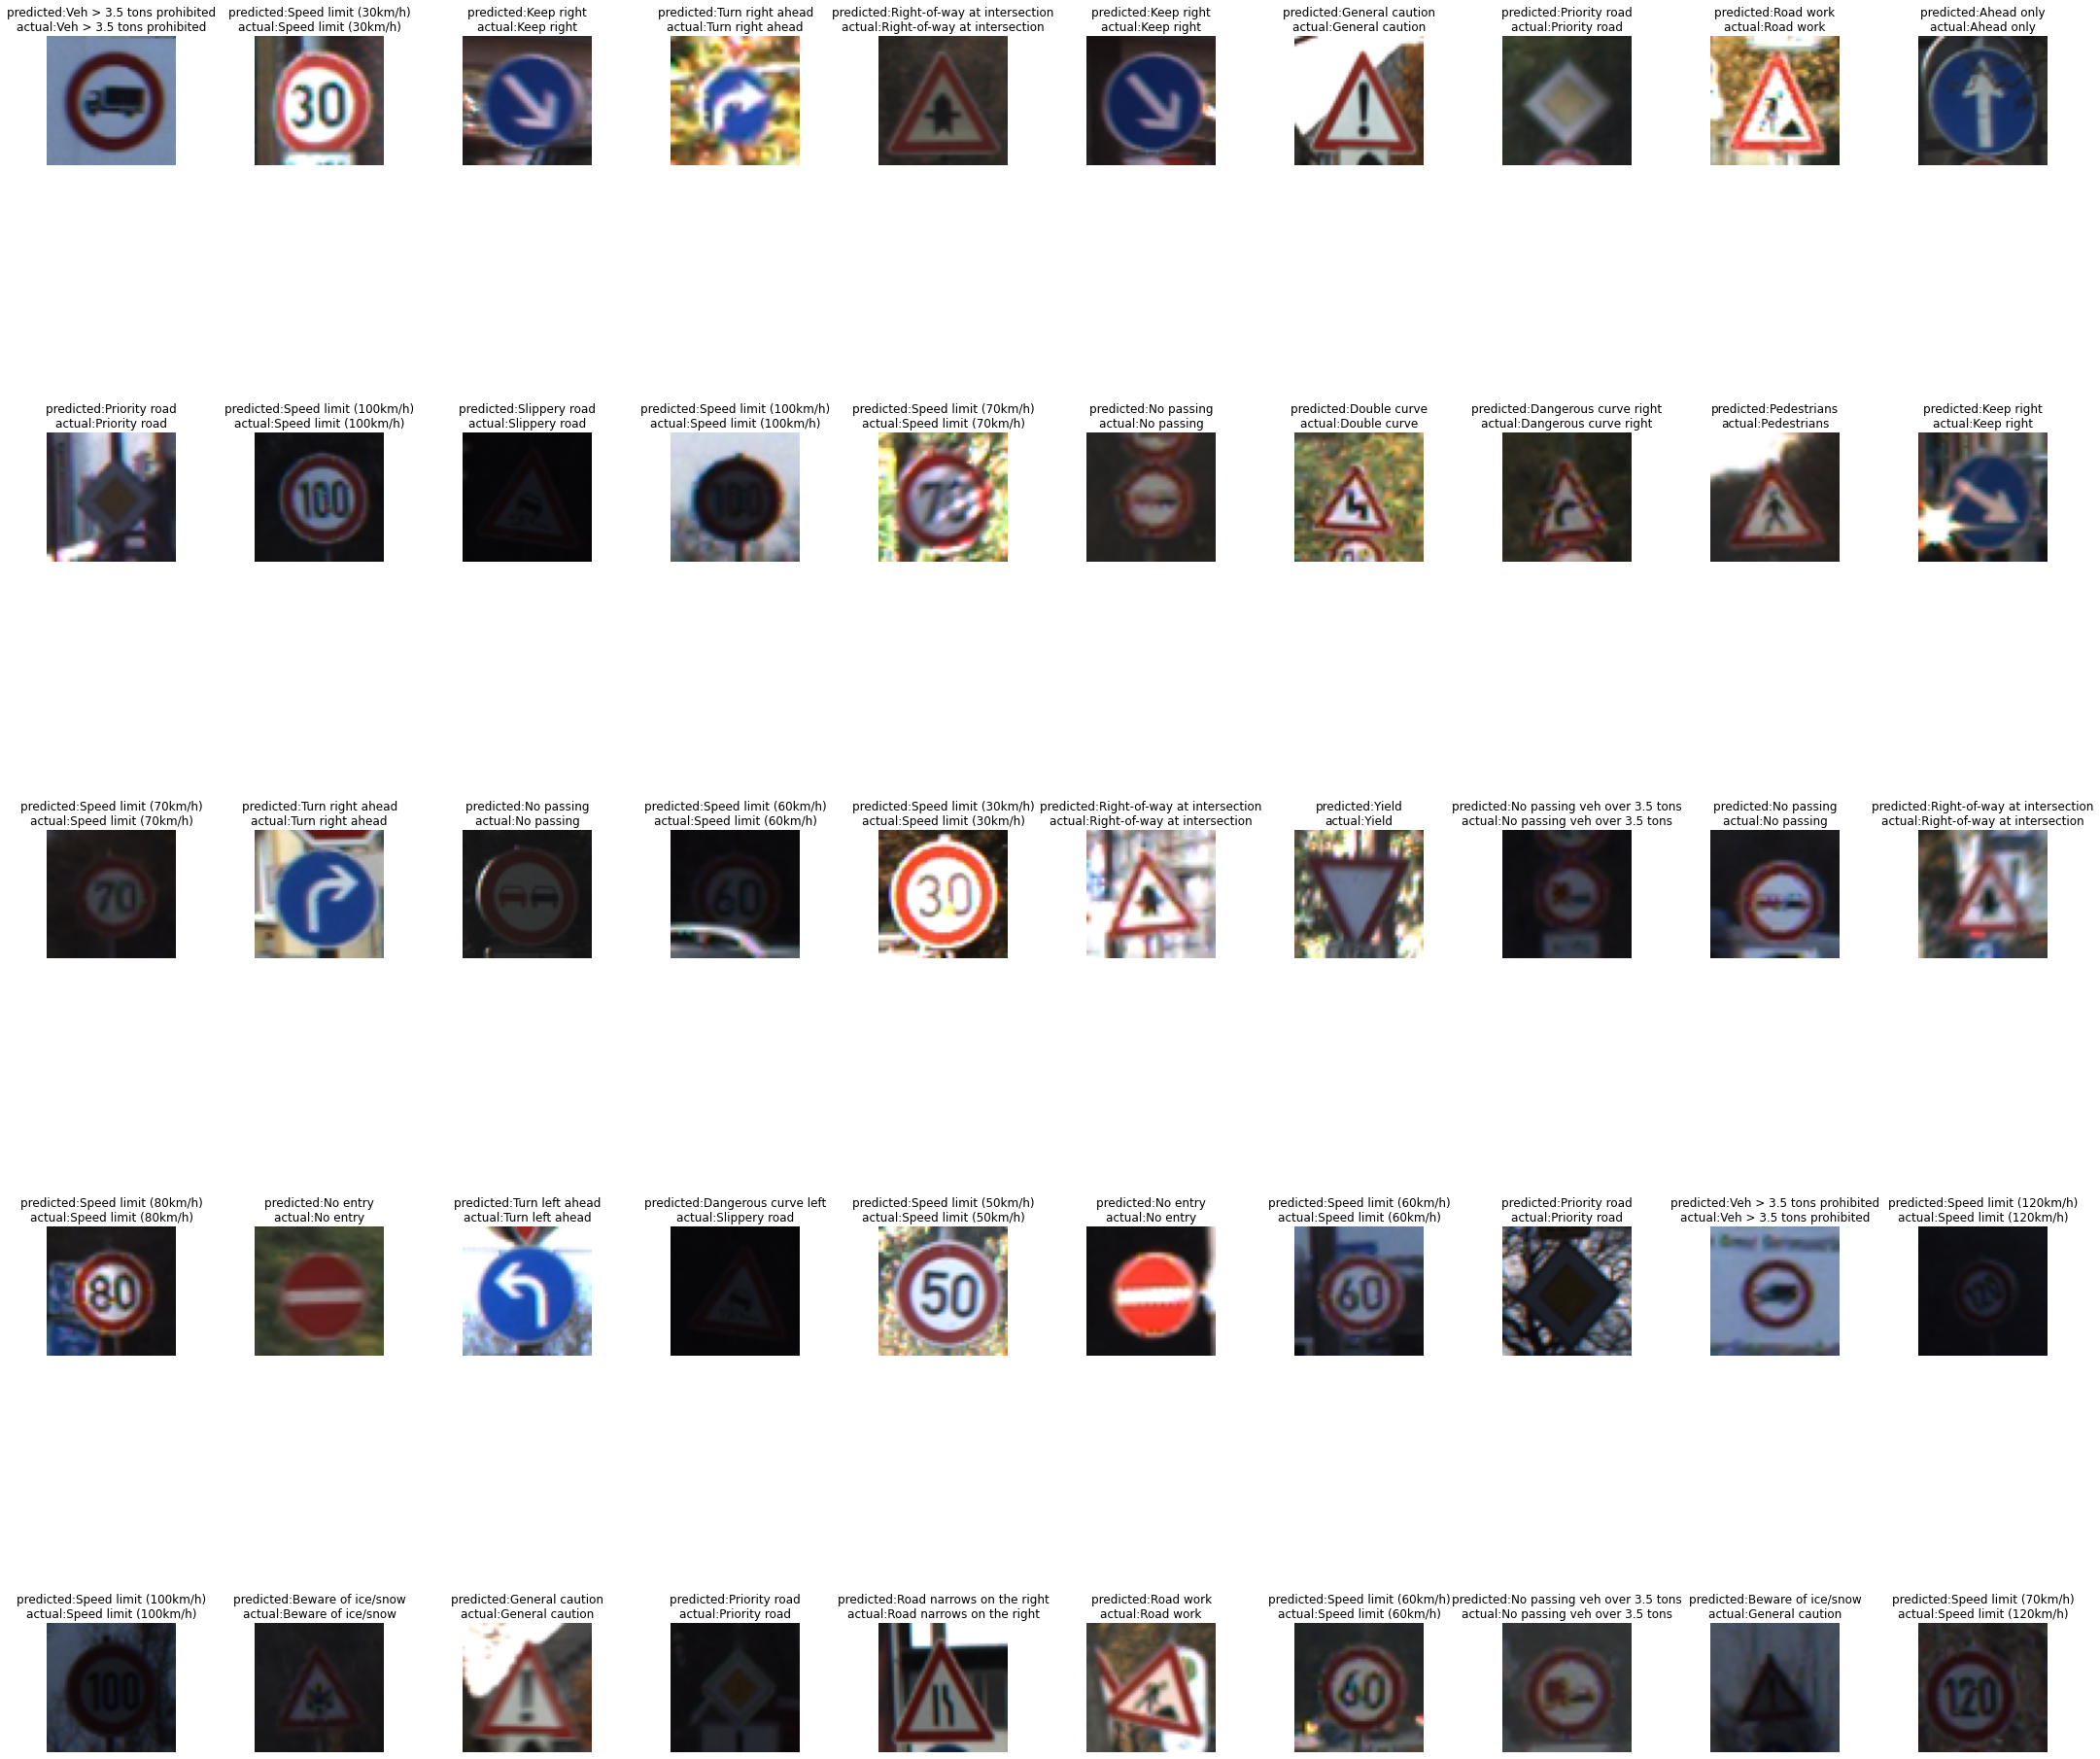

In [30]:
# Print the predicted images


plt.figure(figsize=(30,30))
for i in range(50):
    ax = plt.subplot(5,10, i + 1)
    ax.imshow(xtest[i])
    ax.set_title(f'predicted:{classes[pred[i]]}\nactual:{classes[test_y[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
# Applying Confusion matrix to find of the accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(pred,test_y)

print(cm)
print(classification_report(pred,test_y))

[[ 43   1   0 ...   0   0   0]
 [ 12 680  14 ...   0   0   0]
 [  0  14 718 ...   0   0   0]
 ...
 [  0   0   0 ...  66   0   0]
 [  0   0   0 ...   0  51   0]
 [  0   0   0 ...   0   0  90]]
              precision    recall  f1-score   support

           0       0.72      0.96      0.82        45
           1       0.94      0.93      0.94       733
           2       0.96      0.93      0.94       776
           3       0.92      0.89      0.91       466
           4       0.93      0.93      0.93       662
           5       0.89      0.90      0.89       625
           6       0.80      1.00      0.89       120
           7       0.88      0.96      0.92       413
           8       0.94      0.89      0.92       472
           9       0.95      0.97      0.96       471
          10       0.98      0.98      0.98       658
          11       0.98      0.89      0.93       460
          12       0.98      1.00      0.99       678
          13       0.99      0.99      0.99       7

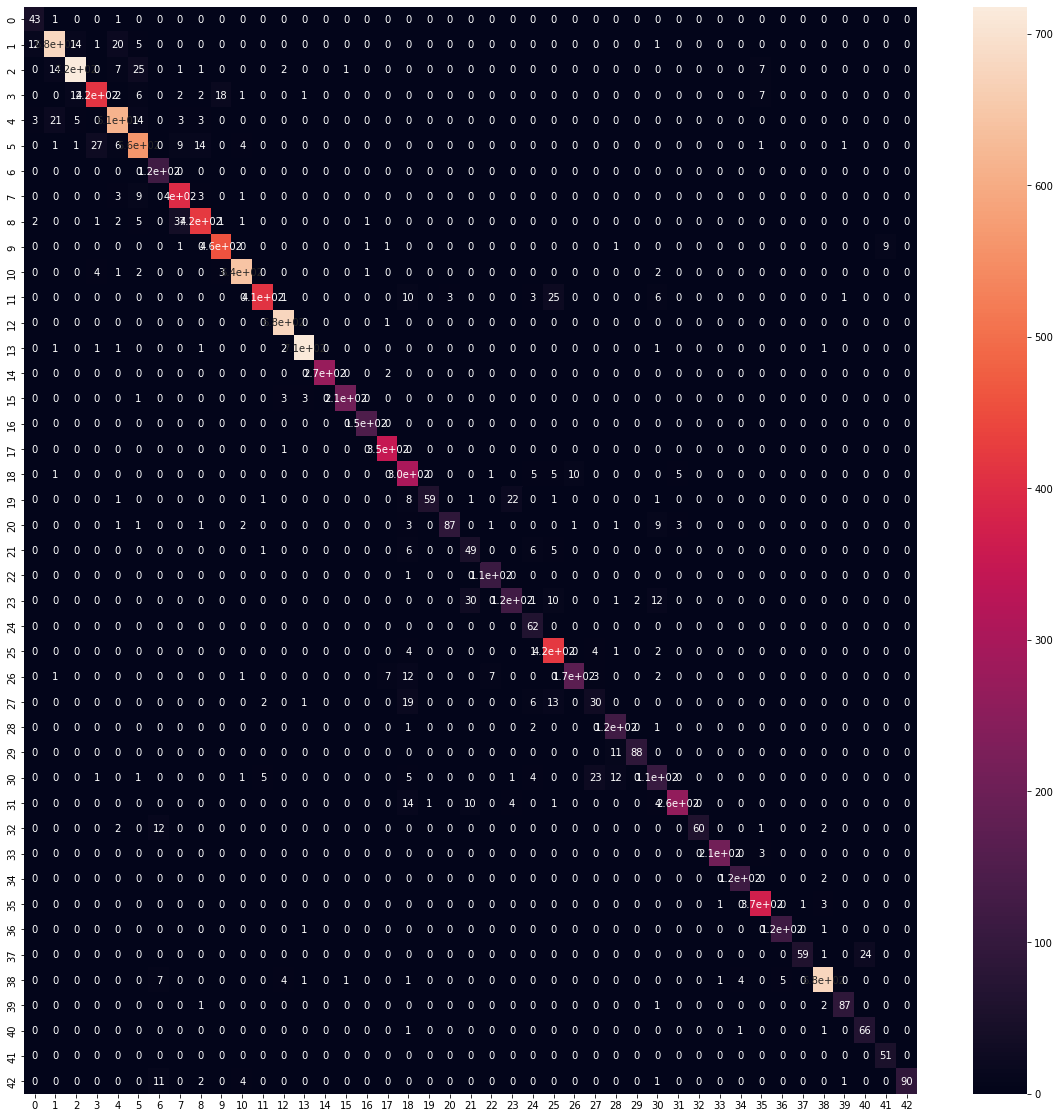

In [32]:
import seaborn as sns
df_cnn = pd.DataFrame(cm, index = classes, columns= classes)
plt.figure(figsize=(20,20))
sns.heatmap(df_cnn, annot=True)

In [ ]:
# Accuracy of the prediction is 0.93%